# Árbol de decisión con clasificación
El objetivo es clasificar con datos sintéticos

author: Virginia Ordoño Bernier
date: January 2024

### Generación de datos

In [47]:
import numpy as np

np.random.seed(41)

# Clase 0. Distribución normal de media 0 y desviación estándar 1
class_0_data = np.random.normal(0, 1, size=(100, 2))
class_0_labels = np.zeros(100) # Representación de etiquetas como ceros

# Clase 1. Distribución normal de media 3 y desviación estándar 1
class_1_data = np.random.normal(3, 1, size=(100, 2))
class_1_labels = np.ones(100) # Representación de etiquetas como unos
class_0_data

array([[-0.27071232,  0.10484805],
       [ 0.25052782, -0.92519997],
       [ 0.56714366, -1.04018022],
       [-0.15367595,  0.78985181],
       [-1.22621585, -0.94800699],
       [-0.56965394, -0.97715021],
       [-0.77063171, -0.03371129],
       [-1.03285925,  1.14242738],
       [-0.60977801,  1.46941639],
       [ 1.49267884,  0.70712523],
       [-1.85849026, -1.37062377],
       [-0.33010639, -1.51528995],
       [ 1.20006019, -1.82261914],
       [ 0.26938454, -0.44642438],
       [ 1.1143136 , -1.3808026 ],
       [ 1.01542452,  0.22408128],
       [-0.64455111,  0.66153166],
       [ 1.29296485, -0.89531205],
       [-0.56831065, -2.11161836],
       [-0.81830772, -0.96238361],
       [ 0.12450167,  0.10850869],
       [-0.43930126, -0.71356037],
       [ 0.93418096,  0.05865553],
       [ 1.60971428,  0.85990674],
       [-0.98520304, -0.95836832],
       [ 0.44910865, -0.94246256],
       [ 0.15890945,  0.38807562],
       [ 0.43733776,  0.41822955],
       [-0.73218499,

In [48]:
import pandas as pd

# Formateo de datos
X = np.vstack((class_0_data, class_1_data)) # Une dos matrices en una en forma de pila
y = np.concatenate((class_0_labels, class_1_labels)) # Concatena las matrices de los nombres en una en forma de columna

# Creación del dataframe
df_classes = pd.concat([pd.DataFrame(X, columns=['feature_1', 'feature_2']) ,  pd.DataFrame(y, columns=['target'])], axis=1)

# Clase target solo con enteros
df_classes.target = df_classes.target.astype(int)

### Gráfico de dispersión

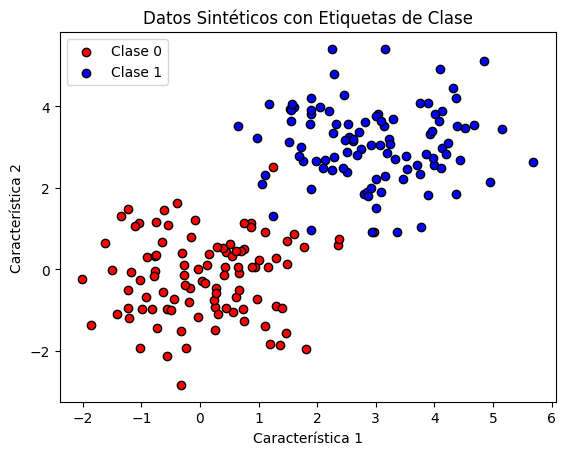

In [49]:
import matplotlib.pyplot as plt

COLORS = ('red', 'blue')

for i, data in enumerate((class_0_data, class_1_data)):
    plt.scatter(data[:, 0], data[:, 1], c=COLORS[i], edgecolor='k', label=f"Clase {i}")

plt.title('Datos Sintéticos con Etiquetas de Clase')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.show()

### Preparación de los datos para el entrenamiento

In [50]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_classes, test_size=0.33, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
   index  feature_1  feature_2  target
0     42  -1.338782   1.320063       0
1    189   0.972373   3.227486       1
2     90  -1.234605   1.470797       0
3    136   2.247596   2.442699       1
4     51  -0.634127  -0.561483       0

Conjunto de prueba:
   index  feature_1  feature_2  target
0     95  -1.205791  -1.190786       0
1     15   1.015425   0.224081       0
2     30   1.803952  -1.948671       0
3    158   3.917554   3.329283       1
4    128   2.928391   0.908526       1


### Validación cruzada: optimización de parámetros

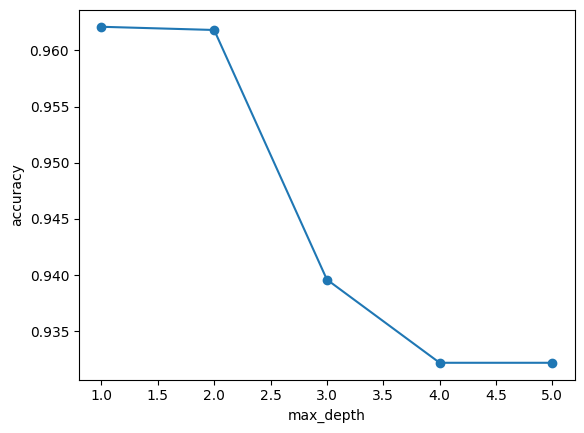

In [51]:
from sklearn import tree
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt    

cv = KFold(n_splits = 5) # para que coja los mismos datos para la particion
# n_splits: Número de iteraciones de entrenamiento y validación que se realizarán.
accuracies = list()
max_attributes = len(list(df_classes))
depth_range = range(1, max_attributes * 2)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = depth, random_state=42)
    
    for train_fold, test_fold in cv.split(train):
        f_train = df_classes.loc[train_fold]
        f_test = df_classes.loc[test_fold]
        
        model = tree_model.fit( X = f_train.drop(['target'], axis=1), 
                               y = f_train['target'])
        test_acc = model.score(X = f_test.drop(['target'], axis=1), 
                                y = f_test['target'])
        fold_accuracy.append(test_acc)
        
    accuracies.append(np.mean(fold_accuracy))
    
plt.plot(depth_range, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

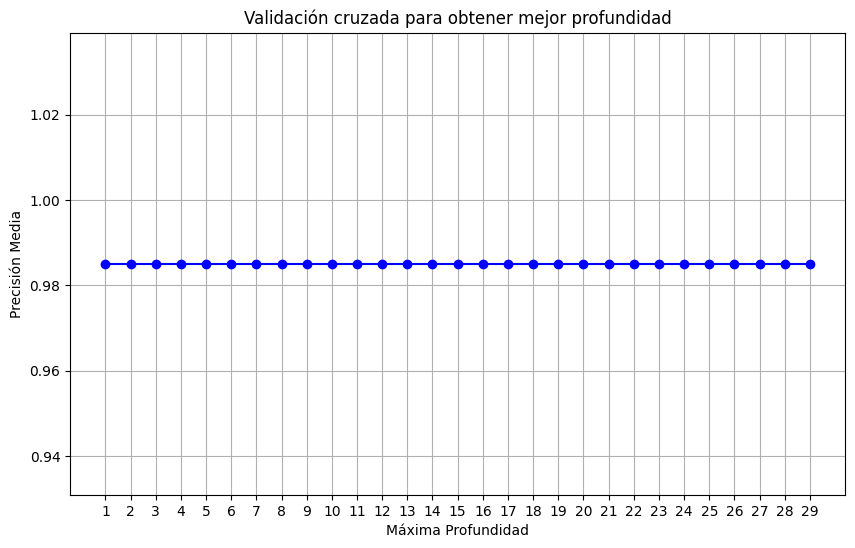

Mejor profundidad: 1
Mayor Precisión Media: 0.9850713012477719


In [52]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cv = KFold(n_splits=4)

total_scores = []
best_depth = ''
max_accuracy = 0.0

for i in range(1, 30):
    fold_accuracies = []
    dt = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    # Divide train and test groups
    for train_fold, test_fold in cv.split(train):
        f_train = train.iloc[train_fold] # train_fold index, selects a row. F_train is a new df 
        f_test = train.iloc[test_fold] # test_fold index, selects a row. F_test is a new df

        dt.fit(
            X=f_train.drop(['target'], axis=1),  # thorugh the column
            y=f_train['target']
        )
        X_test = f_test.drop(['target'], axis=1)  # thorugh the column
        y_pred = dt.predict(X_test)

        # Evaluation
        accuracy = accuracy_score(f_test['target'], y_pred)
        fold_accuracies.append(accuracy)
    
    # Calculate and store the average accuracy for the current depth
    avg_accuracy = np.mean(fold_accuracies)
    total_scores.append(avg_accuracy)
    
    # Check if the current depth results in a bigger accuracy
    if avg_accuracy > max_accuracy:
        max_accuracy = avg_accuracy
        best_depth = i

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), total_scores, marker='o', color='b')
plt.title('Validación cruzada para obtener mejor profundidad')
plt.xlabel('Máxima Profundidad')
plt.ylabel('Precisión Media')
plt.xticks(range(1, 30))
plt.grid(True)
plt.show()

# Print the results
print(f"Mejor profundidad: {best_depth}")
print(f"Mayor Precisión Media: {max_accuracy}")


### Creación del modelo con los mejores hiperparámetros 

In [53]:
from sklearn.metrics import classification_report
X_train = train[['feature_1', 'feature_2']]
y_train = train['target']
X_test = test[['feature_1', 'feature_2']]
y_test = test['target']

model = DecisionTreeClassifier(max_depth = 1) # all  the same
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

print("\nInforme de Clasificación Índice de Gini:")
print(classification_report(y_test, y_pred)) 


Informe de Clasificación Índice de Gini:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.97      0.90      0.93        31

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66



### Visualizacion del árbol de decisión

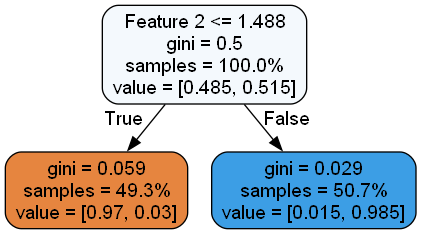

In [54]:
import pydot
from IPython.display import Image

from io import StringIO

from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(model, out_file = dot_data, proportion = True, feature_names = ["Feature 1", "Feature 2"], rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Importancia de las variables
La importancia de las variables se deriva del propio modelo, y se calcula observando cómo cada característica contribuye a reducir la impureza (o aumentar la pureza) de los nodos en el árbol de decisión durante el proceso de entrenamiento.

In [55]:
#X_train = train.drop('Label', axis=1)

# Gini criterio by default
classifier = tree.DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Get importance
importances = classifier.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Exclude column 'index' if exists
if 'index' in feature_importance_df['Feature'].values:
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'index']

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Informe de Importancia:")
print(feature_importance_df)



Informe de Importancia:
     Feature  Importance
1  feature_2    0.912618
0  feature_1    0.087382
